C:\Users\Dhiya\AppData\Local\Temp\ipykernel_12828\3202077060.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Total_Score'] = df['Total_Score'].fillna(method='ffill').fillna(method='bfill').fillna(0)


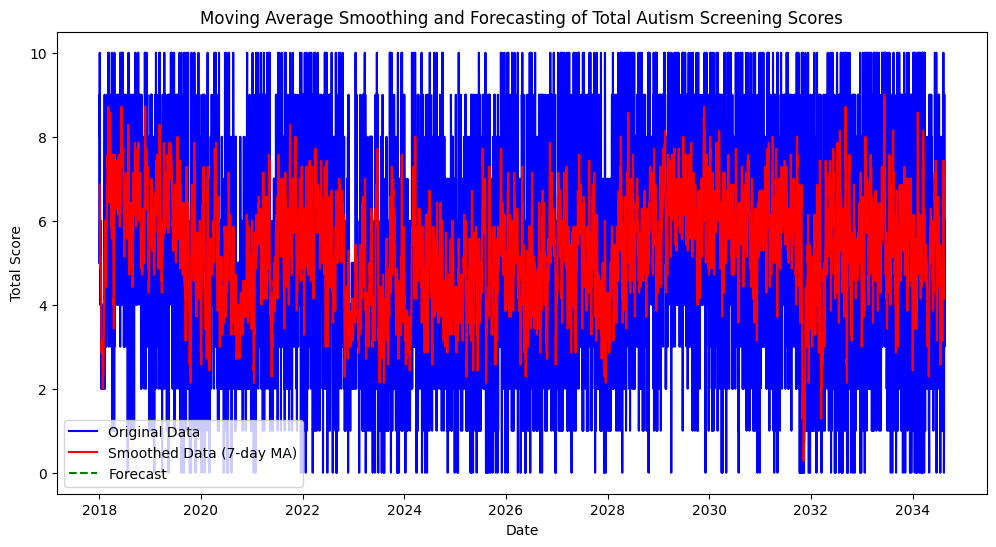

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Autism Screening for Toddlers dataset
df = pd.read_csv('superstores.csv')#actual file path

# Simulate a time series by adding a timestamp (since the dataset lacks explicit time data)
date_rng = pd.date_range(start='2018-01-01', periods=len(df), freq='D')  # Daily frequency for demo
df['timestamp'] = date_rng
df.set_index('timestamp', inplace=True)

# Calculate Total_Score as the sum of A1 to A10 scores
df['Total_Score'] = df[['A1', 'A2', 'A3', 'A4', 'A5', 
                        'A6', 'A7', 'A8', 'A9', 'A10']].sum(axis=1)

# Clean data (handle any potential missing values)
df['Total_Score'] = df['Total_Score'].fillna(method='ffill').fillna(method='bfill').fillna(0)

# Apply moving average smoothing with a 7-day window
df['smoothed'] = df['Total_Score'].rolling(window=7, center=True).mean()

# Prepare data for forecasting (simple moving average forecast for the next 7 days)
forecast_periods = 7
last_smoothed_value = df['smoothed'].iloc[-1]
forecast = np.full(forecast_periods, last_smoothed_value)  # Simple forecast using last smoothed value
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='D')

# Combine original, smoothed, and forecast data for plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Total_Score'], label='Original Data', color='blue')
plt.plot(df['smoothed'], label='Smoothed Data (7-day MA)', color='red')
plt.plot(forecast_index, forecast, label='Forecast', color='green', linestyle='--')
plt.title('Moving Average Smoothing and Forecasting of Total Autism Screening Scores')
plt.xlabel('Date')
plt.ylabel('Total Score')
plt.legend()
plt.show()